In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
from sympy import Symbol
from sympy import solve, lambdify
from surface_dynamics.all import *
import os
from Poincare import *
from Poincare import Section
import math

In [3]:
#Code from Sunrose
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [4]:
def vectors(perm, length = 200):
    a = str(perm)
    h, v = a.split("\n")
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    sc_list = T.saddle_connections(length)
    slopes_all = []
    for item in sc_list:
        vec = item.holonomy().n()
        direction = item.direction
        if vec not in slopes_all:
            if vec[0] >= -length/20 and vec[0] <= length/20:
                if vec[1] >= -length/20 and vec[1] <= length/20:
                    slopes_all.append(item.holonomy().n())         
    vecs = []
    for vec in slopes_all:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    return vecs

In [5]:
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [6]:
permutations = perms_list(6)

In [18]:
for i in range(len(permutations)):
    n_squares = 6
    perm = permutations[i]
    vecs = vectors(perm,500)
    comp(perm, vecs, 6, i)

KeyboardInterrupt: 

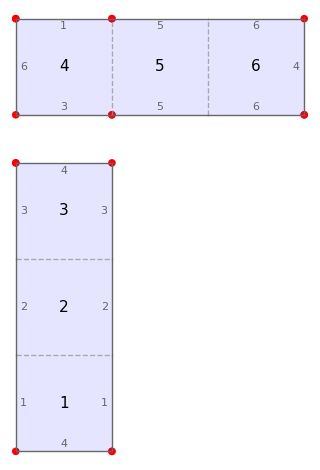

In [8]:
perm = permutations[3]
vecs0 = vectors(perm, 6000)
n_squares = 5
index = 4
dx = 0.002
alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
perm.show()

In [9]:
alphas

[3.0, 148.0, 424.0, 125.0, 260.0, 204.0, 30.0, 12.0]

In [10]:
i = 1
vecs, x_vals, m0, m1, y0, dx_y = setup(alphas[i], Cs[i], eigs[i], vecs0, dx)
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
plot(df, vecs, Cs[i], 1, n_squares, index, test = True)

12484
6242


KeyboardInterrupt: 

In [ ]:
df["lab"].unique()

In [ ]:
df

In [11]:
sec_list = sec_setup(df, dx)
secs = sec_comp(sec_list,dx)
pdf(list(df["time"]), time_comp(secs), dx, test = True)

ValueError: Section has more than 2 points for a given 'x'

In [12]:
vecs0 = vectors(perm, 200)

In [29]:
a = 0.998
b = -2.986
dx = 0.002
vecs = np.array([[3],[1]]), np.array([[9],[3]])
winner_slope = None
winner = None
Mab = np.array([[a, b], [0, 1/a]])
for vec in vecs:
    new = Mab@vec
    if float(new[0][0]) == 0:
        continue
    x = float(new[0][0])
    y = float(new[1][0])
    if y/x <= 0:
        continue
    if x <= 1 and x > 0:
        if winner_slope == None:
            winner_slope = y/x
            print(winner_slope)
            winner = vec
            continue
        print(abs(y/x - winner_slope) <= dx/10)
        if abs(y/x - winner_slope) <= dx/10:
            if vec[0][0] < winner[0][0] or vec[1][0] < winner[1][0]:
                winner = vec
                continue
        elif y/x < winner_slope:
            winner_slope = y/x
            winner = vec
            print(winner_slope)
            continue

125.25050100200735
True


In [30]:
winner

array([[3],
       [1]])

125.25050100200505